In [15]:
import sys
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
tStart = time.time()

In [16]:
def load_model(filename):
    model = pickle.load(open(filename, 'rb'))
    return model

In [17]:
#print("load test_x")
test_x = pd.read_csv("./x1.csv")
#print("load test_y")
test_y = pd.read_csv("./y1.csv")

#print("test_x to array")
test_x = np.array(test_x, dtype = 'float64')
#print("test_y to array")
test_y = np.array(test_y, dtype = 'float64')

file_name = "model_RF"
model = load_model(file_name)

#print("test_x", test_x)
#print("test_x", test_x.shape)
predict_test = model.predict(test_x)
#print("predict_test", predict_test)
#print("predict_test", predict_test.shape)
#print("test_y", test_y)
#print("test_y", test_y.shape)


In [18]:
print (np.mean(np.mean((predict_test - test_y)**2, axis=0)**(0.5)))

9.270139921324249e-05


In [19]:
tEnd = time.time()
print(tEnd-tStart)

0.584744930267334


In [6]:
tmp = np.zeros((1,len(test_x[0])))
for i in range(len(test_x[0])):
    tmp[0][i] = test_x[0][i]
Z=tmp
for i in range(3998):
    tmp = model.predict(tmp)
    #print(tmp)
    Z = np.append(Z,tmp,axis=0)

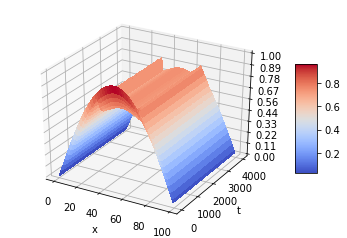

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
Y1=np.arange(3999)
X=np.arange(100)
X, Y1 = np.meshgrid(X, Y1)
# Plot the surface.
surf = ax.plot_surface(X, Y1, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('x')
plt.ylabel('t')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [8]:
#pre = pd.DataFrame(predict_test)
#pre.to_csv("pre_y1.csv", encoding='utf-8', header=False, index=False)